In [1]:
import nbsetup
from models.load import load
import nbsetup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from references import milkyway as mref

In [8]:
mm = load('milkymass_huang2016_500')

Loaded milkymass_huang2016_500


In [12]:
mp = np.arange(20)

In [13]:
lp = np.arange(20,30)

In [16]:
np.array(np.meshgrid(mp, lp)).T.reshape(-1,2)

array([[ 0, 20],
       [ 0, 21],
       [ 0, 22],
       [ 0, 23],
       [ 0, 24],
       [ 0, 25],
       [ 0, 26],
       [ 0, 27],
       [ 0, 28],
       [ 0, 29],
       [ 1, 20],
       [ 1, 21],
       [ 1, 22],
       [ 1, 23],
       [ 1, 24],
       [ 1, 25],
       [ 1, 26],
       [ 1, 27],
       [ 1, 28],
       [ 1, 29],
       [ 2, 20],
       [ 2, 21],
       [ 2, 22],
       [ 2, 23],
       [ 2, 24],
       [ 2, 25],
       [ 2, 26],
       [ 2, 27],
       [ 2, 28],
       [ 2, 29],
       [ 3, 20],
       [ 3, 21],
       [ 3, 22],
       [ 3, 23],
       [ 3, 24],
       [ 3, 25],
       [ 3, 26],
       [ 3, 27],
       [ 3, 28],
       [ 3, 29],
       [ 4, 20],
       [ 4, 21],
       [ 4, 22],
       [ 4, 23],
       [ 4, 24],
       [ 4, 25],
       [ 4, 26],
       [ 4, 27],
       [ 4, 28],
       [ 4, 29],
       [ 5, 20],
       [ 5, 21],
       [ 5, 22],
       [ 5, 23],
       [ 5, 24],
       [ 5, 25],
       [ 5, 26],
       [ 5, 27],
       [ 5, 28

In [11]:
mass_analysis(mm)

(100, 500, 500) 0.2 50
buldge 1.0787664092400682 0.89 1.2120970890337845
thin 3.1695494643607383 3.15 1.006206179162139
thick 0.6177878496384479 0.62 0.9964320155458838
gas 1.3624134452919237 0.55 2.477115355076225


In [62]:
points = (50, 100, 200)
sims = {}
for p in points:
    sims[p] = load('milkytest_huang2016_%s' % p)

Loaded milkytest_huang2016_200
11835 of 25000, 47.3%
7142 of 25000, 28.6%
10273 of 25000, 41.1%
6361 of 25000, 25.4%
8709 of 25000, 34.8%
9493 of 25000, 38.0%
11054 of 25000, 44.2%
7924 of 25000, 31.7%
11836 of 25000, 47.3%
7143 of 25000, 28.6%


In [2]:
sim50 = load('milkytest_huang2016_50')

Loaded milkytest_huang2016_50


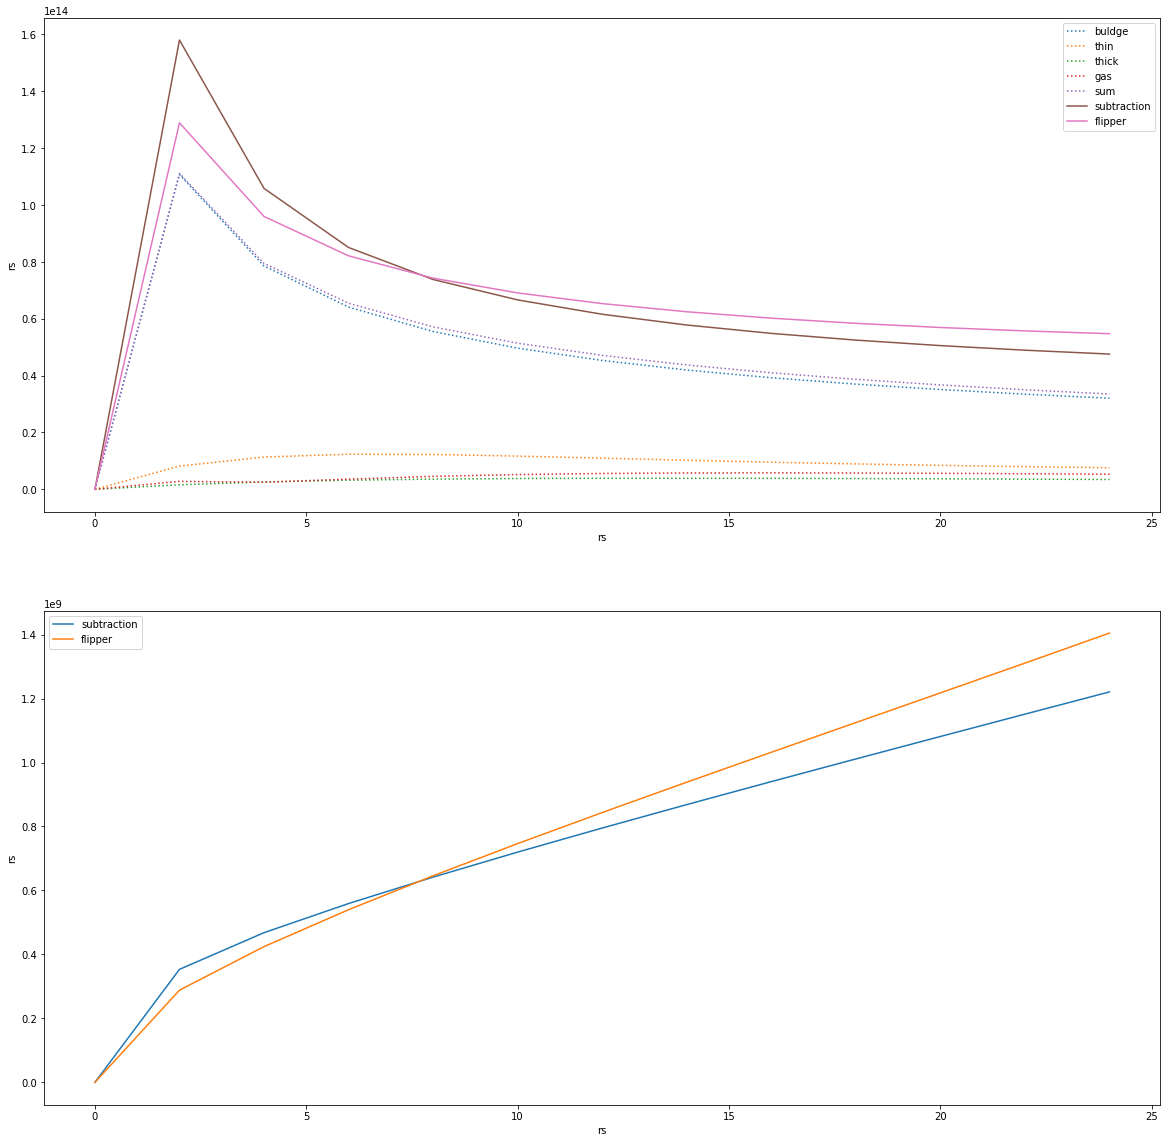

In [6]:
plot_velocities(sim50)

In [10]:
def mass_analysis(self):
    print(self.space.points, self.space.scale, self.radius)
    for i, mass in enumerate(self.mass_components):
        smass = np.sum(mass)
        label = self.mass_labels[i]
        ref = mref.profiles['huang2016'][label]['mass'][0]
        print(label, smass/(10**10), ref/(10**10), smass/ref)

In [18]:
print(0.9, 0.62, 3.15)
print(2, 0.5, 4)

for p, sim in sims.items():
    mass_analysis(sim)
    print(' ')


0.9 0.62 3.15
2 0.5 4
(50, 50, 50) 2.0 50
buldge 79.8826035283474 0.89 89.75573430151394
thin 4.21365891946863 3.15 1.3376694982440096
thick 0.8097967992735348 0.62 1.3061238697960238
gas 1.8542363221855724 0.55 3.3713387676101316
 
(100, 100, 100) 1.0 50
buldge 10.673383919058166 0.89 11.99256620118895
thin 3.4249152004973746 3.15 1.0872746668245634
thick 0.666373288157889 0.62 1.0747956260611113
gas 1.4832152913410137 0.55 2.6967550751654796
 
(200, 200, 200) 0.5 50
buldge 2.1544127920254295 0.89 2.420688530365651
thin 3.2254679343928165 3.15 1.023958074410418
thick 0.6285543980271106 0.62 1.013797416172759
gas 1.3890034638983932 0.55 2.525460843451624
 


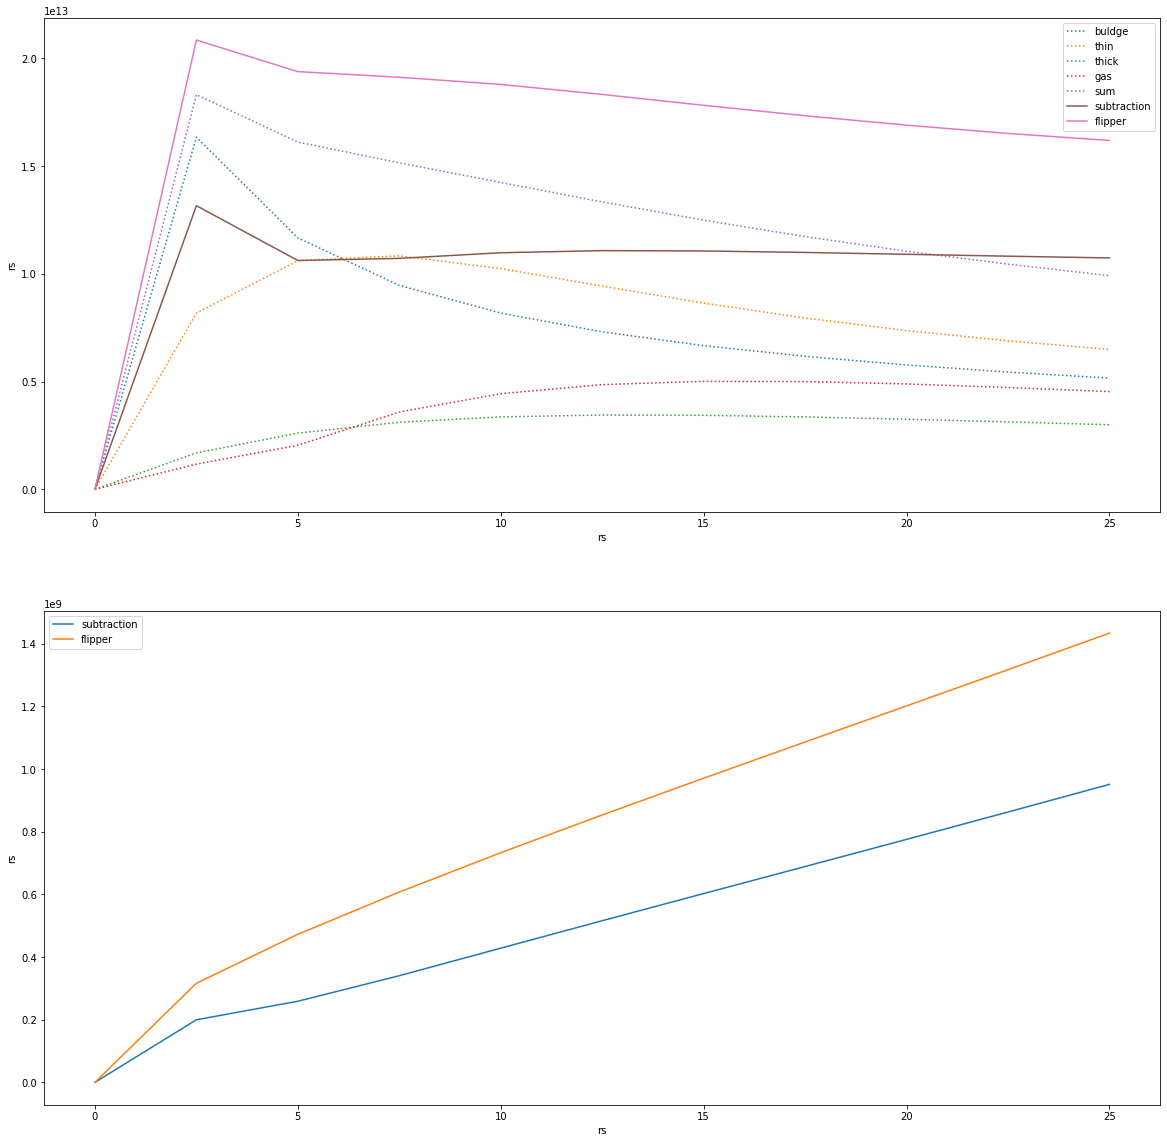

In [36]:
plot_velocities(sims[200])

In [5]:
kpc_to_km = 30856780000000000

def vkms(arr, r):
    return (np.abs(r*arr*kpc_to_km)**0.5)

def plot_velocities(self, dimension=2, xlim=(0,None)):
        
    df = self.dataframe()
    sums = df.query('component=="sum"')
    r = sums['rs']
    
    gx = np.abs(sums[dimension]).to_numpy()
    ax = sums['a%s' % dimension].to_numpy()
    ex = ax-gx
    
    trials = {
        'subtraction': 5*(1-(ex/gx)**0.1),
        'flipper': 32*(1+ex**0.15)**-1,
    }
    
    fig, axes = plt.subplots(2, 1, figsize=(20,20))
    
    for component in df['component'].unique():
        vels = vkms(df.query('component=="%s"' % component)[dimension].to_numpy(), r)
        sns.lineplot(x=r, y=vels, ax=axes[0], label=component, linestyle='dotted')
    
    for label, formula in trials.items():
        sns.lineplot(x=r, y=vkms(gx*formula, r), ax=axes[0], label=label)
        sns.lineplot(x=r, y=vkms(formula, r), ax=axes[1], label=label)
    
    #for key, obs in mref.observations.items():
    #    sns.scatterplot(x=obs['radius'], y=obs['velocity'], ax=axes[0], label=key).set(xlim=xlim)
        


Loaded milky_test_mcmillian2011best_50
buldge 9.61326396942348 2.0 19.22652793884696 76.90611175538784 1.201657996177935
thick 0.25097664335903197 2.0 0.5019532867180639 2.0078131468722558 0.031372080419878996
thin 1.8238329065543717 2.0 3.6476658131087434 14.590663252434974 0.22797911331929646


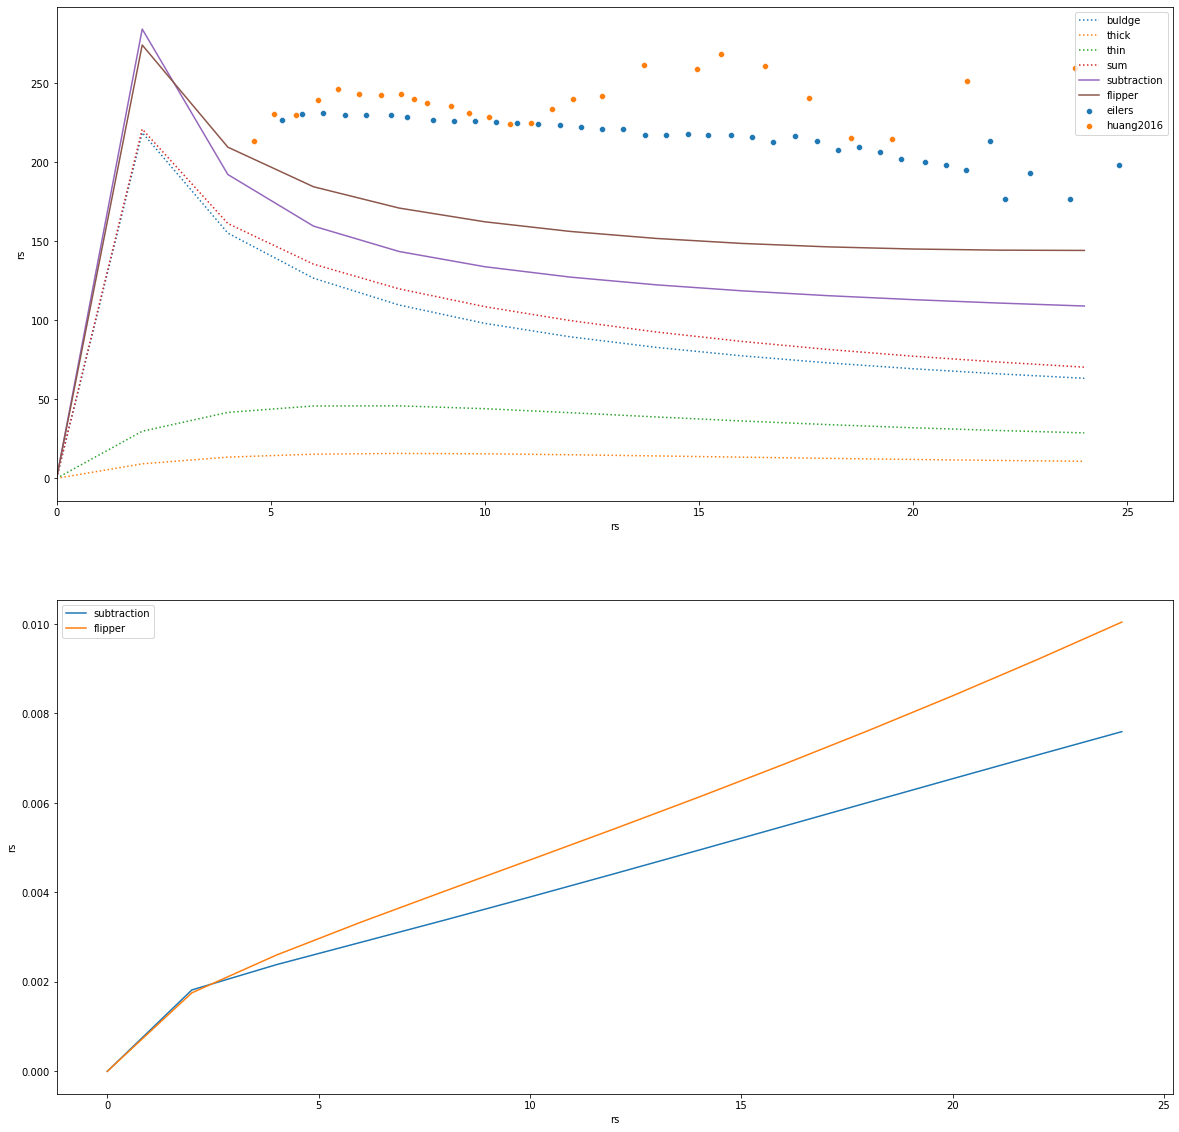

In [110]:
mc500 = load('milky_test_mcmillian2011best_50')
plot_velocities(mc500)

Loaded milky_test_mcmillian2011best_200
buldge 16.593100738580553 0.5 8.296550369290276 2.074137592322569 132.74480590864442
thick 11.834144102016605 0.5 5.917072051008303 1.4792680127520756 94.67315281613284
thin 42.171964931714044 0.5 21.085982465857022 5.2714956164642555 337.37571945371235


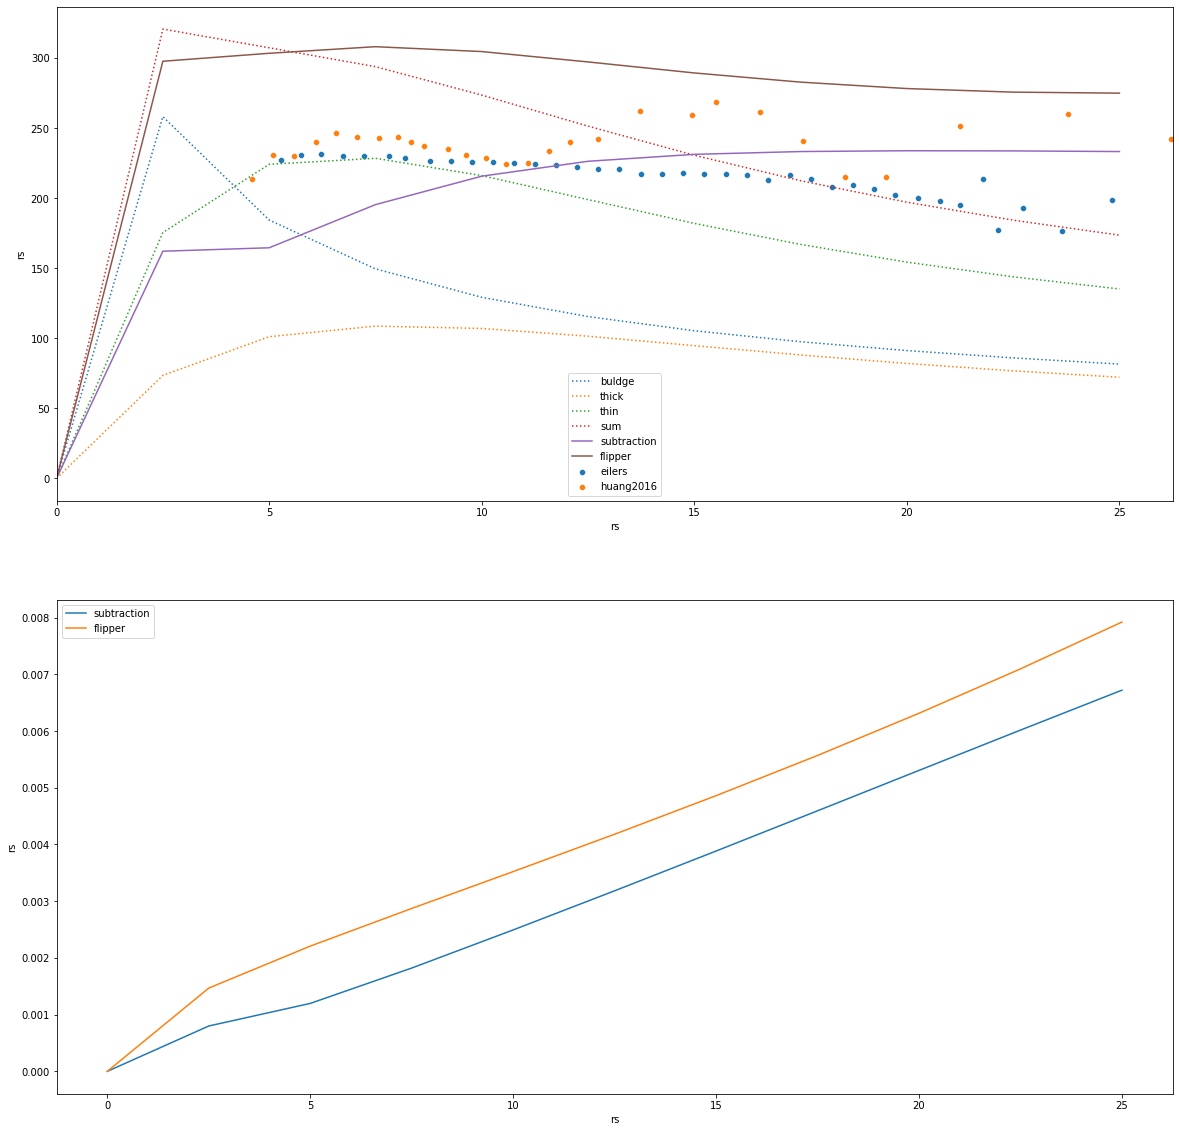

In [111]:
mc100 = load('milky_test_mcmillian2011best_200')
plot_velocities(mc100)

Loaded milky_test_mcmillian2011best_200


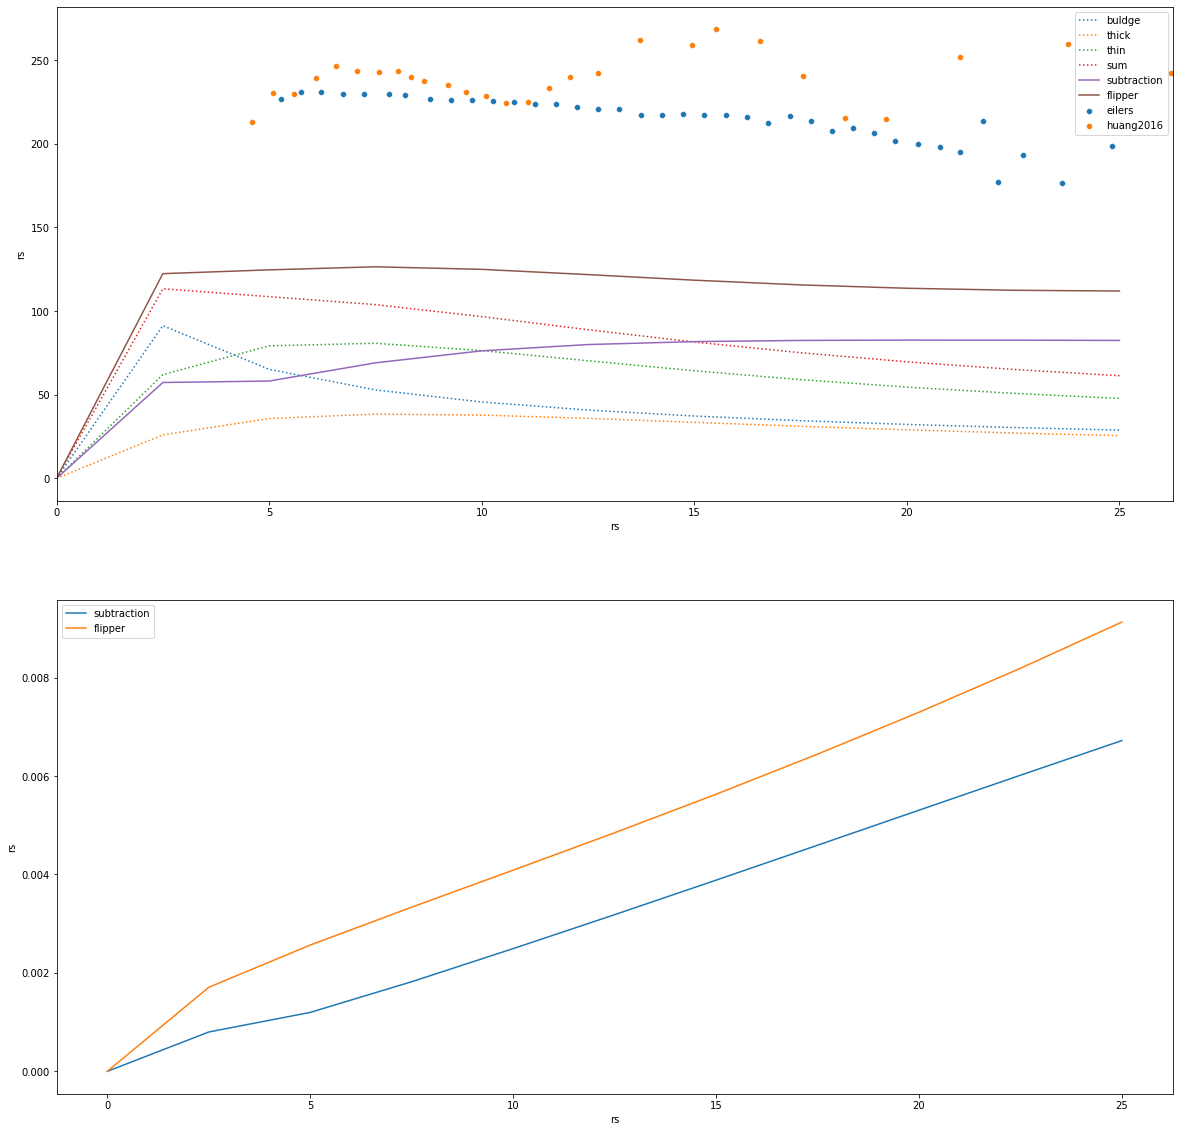

In [93]:
mc200 = load('milky_test_mcmillian2011best_200')
plot_velocities(mc200)

Loaded milky_test_mcmillian2011best_50


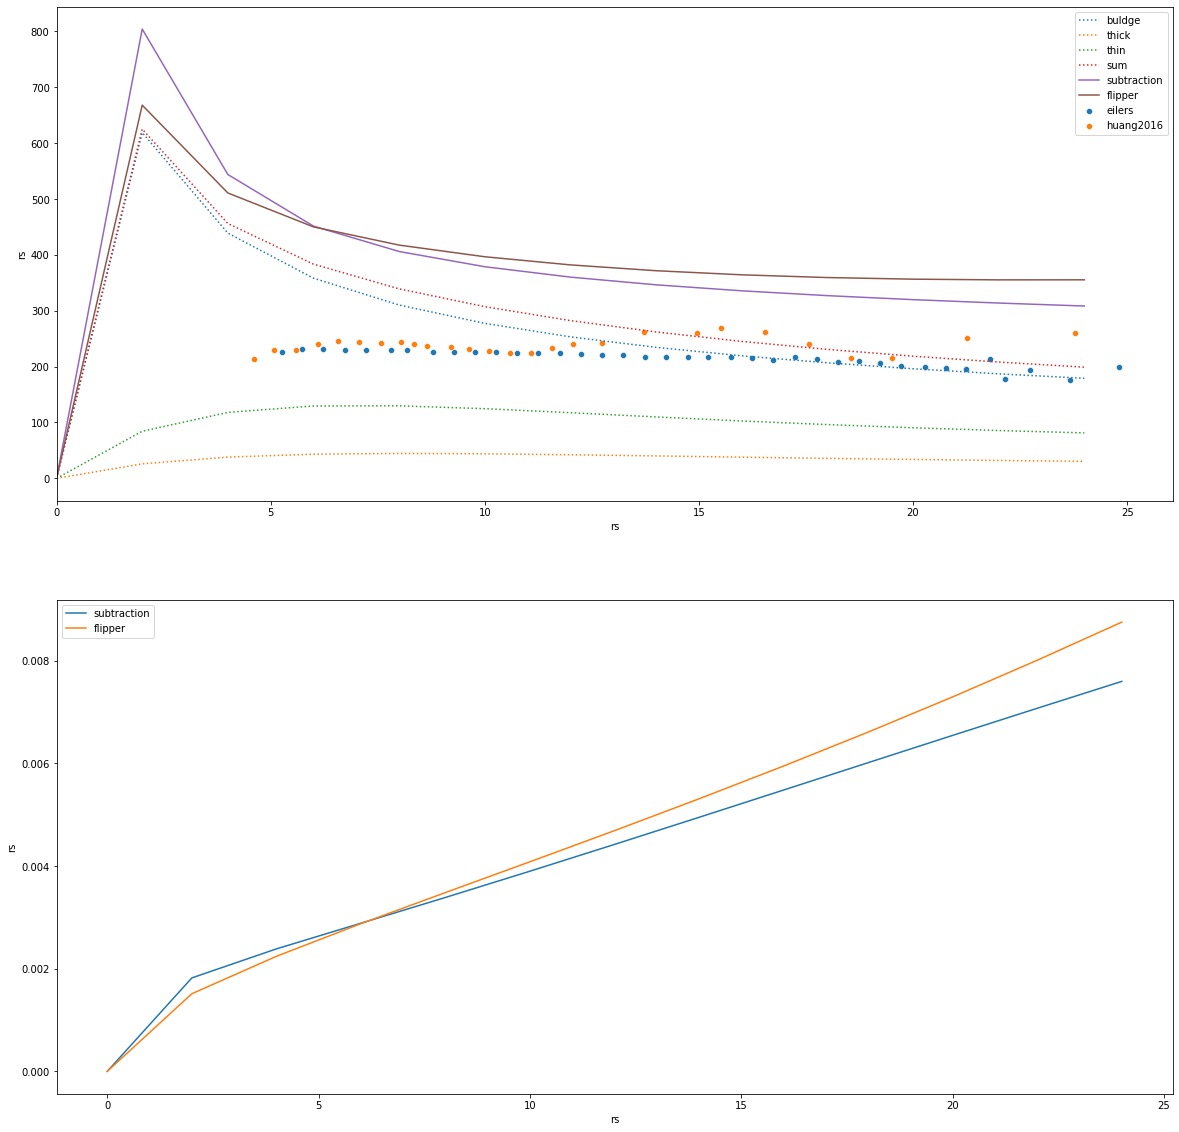

In [90]:
mc50 = load('milky_test_mcmillian2011best_50')
plot_velocities(mc50)

In [14]:
mass_components = ['buldge', 'thick', 'thin']

def vkms(arr, r):
    return (np.abs(r*arr)**0.5)/1000

def plot_velocities(self, dimension=2, xlim=(0,None), ylim=(None,None), components=False):
    plots = self.fields
    stack = self.space.center[0]
    row = self.space.center[1]
    r = self.space.x
    
    fig, axes = plt.subplots(2, 1, figsize=(20,20))
    refs = axes[1]
    vels = axes[0]
    
    if components:
        for mi, results in plots.items():
            sns.lineplot(x=r, y=vkms(results[dimension][stack][row], r), label=self.mass_labels[mi], ax=vels)
    
    
    # attempts
    gx = self.sums[dimension][stack][row]
    aa = self.sums['F'][stack][row]
    ax = self.sums['a%s' % dimension][stack][row]
    ex = ax-gx
    
    trials = {
        'subtraction': 1.7*(1-(ex/gx)**0.1),
        'flipper': 3*(1+ex**0.05)**-1,
    }
    
    mass_r, sum_r = self.radius_results
    
    xr = [rz[0] for rz in mass_r.keys()]
    
    for key, value in mass_r.items():
        xr.append(key[0])
        
    
    # references
    #for key, arr in trials.items():
    #    sns.lineplot(x=r, y=arr, label=key, ax=refs).set(xlim=xlim, ylim=ylim)
    
    # trials plot
    sns.lineplot(x=r, y=vkms(gx,r), label='gx', ax=vels).set(xlim=xlim)
    
    for key, arr in trials.items():
        sns.lineplot(x=r, y=vkms(gx*arr,r), label=key, ax=vels)
    
    # actual measures
    #for key, obs in mref.observations.items():
    #    sns.scatterplot(x=obs['radius'], y=obs['velocity'], ax=vels, label=key).set(xlim=xlim, ylim=ylim)
    

In [ ]:
mcbest.ra

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_20840/3268854916.py:28: RuntimeWarning: invalid value encountered in true_divide
  'subtraction': 1.7*(1-(ex/gx)**0.1),
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_20840/3268854916.py:28: RuntimeWarning: invalid value encountered in power
  'subtraction': 1.7*(1-(ex/gx)**0.1),


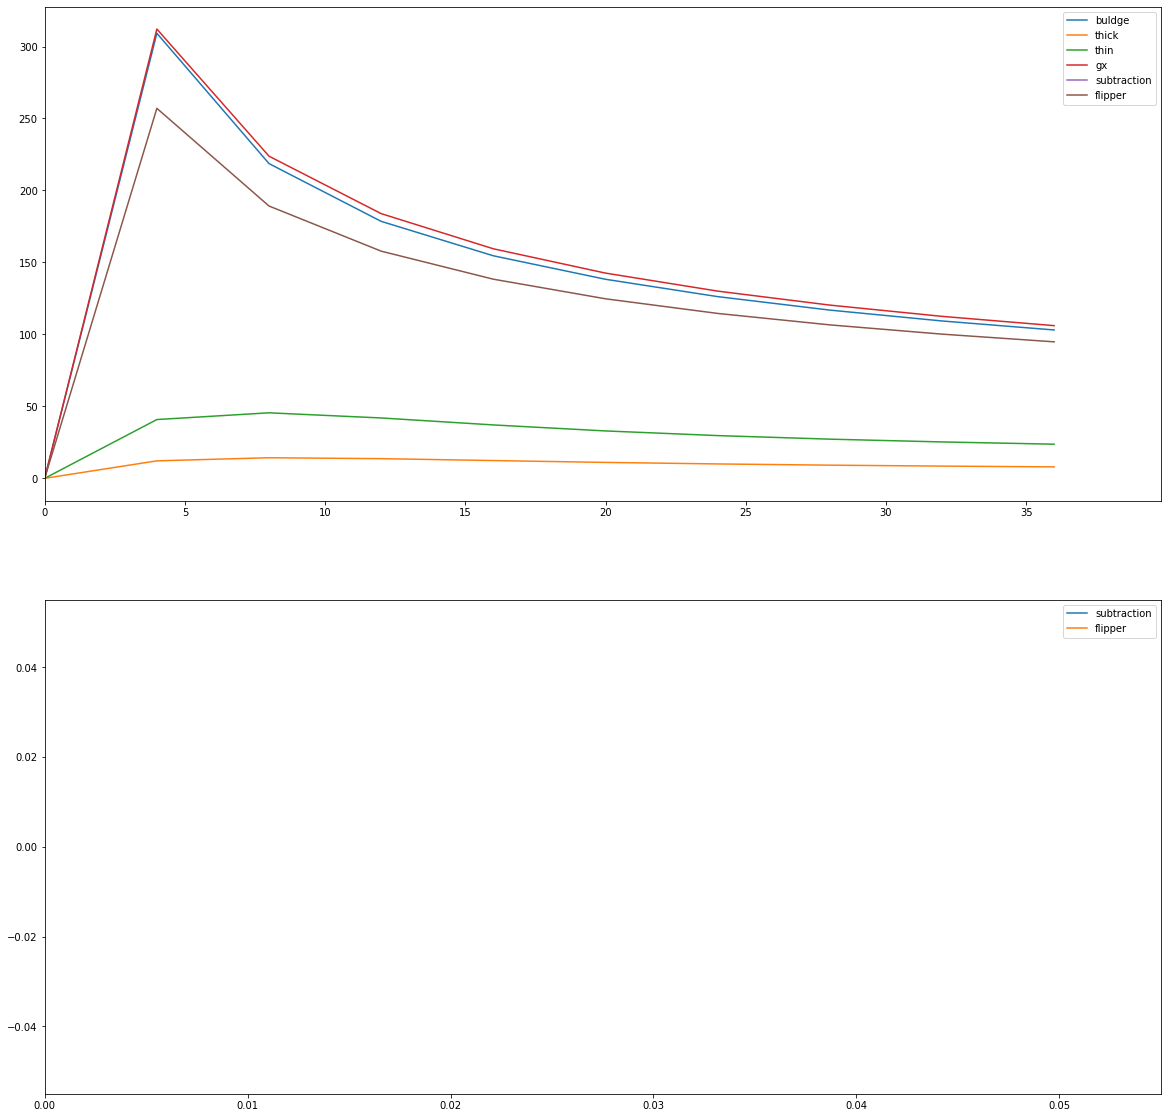

In [4]:
plot_velocities(mcbest, components=True)

In [12]:
mcbest.radius_results[0][(0.0,0.0)][2]

{'F': 498458262.7478161,
 0: 3.302129207890141e-13,
 'a0': 1678.6169249901925,
 1: -21.830615769329157,
 'a1': 275181761.3020891,
 2: -21.830615762044957,
 'a2': 275181761.3020889}

In [3]:
mccon = load('milky_mcmillian2011')

Loaded milky_mcmillian2011


/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_18843/3346248662.py:28: RuntimeWarning: invalid value encountered in true_divide
  'subtraction': 1.7*(1-(ex/gx)**0.1),


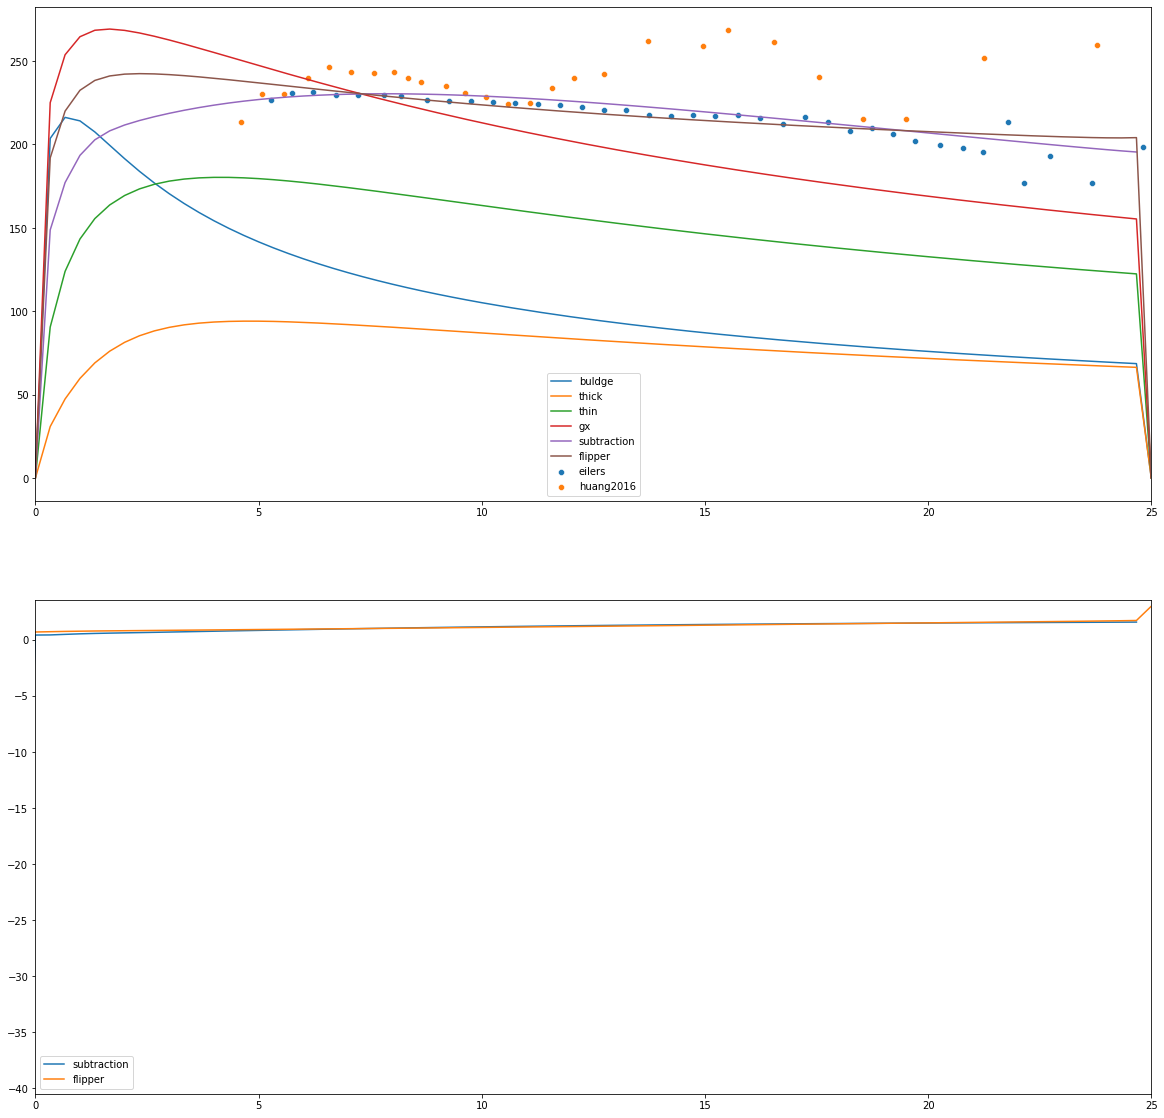

In [62]:
plot_velocities(mccon, xlim=(0,25), components=True)

In [32]:
mccon.mass_components[0].sum()/mccon.profiles['buldge']['mass'][0]

13.472534107219495

In [31]:
mccon.profiles['buldge']['mass'][0]

8900000000.0

In [6]:
mcbest.radius_results

ModuleNotFoundError: No module named 'galaxy'

In [78]:
huang = load('milky_huang2016100')

Loaded milky_huang2016100


In [74]:
mcbest.mass_components[2].sum()/mref.profiles['huang2016']['thin']['mass'][0]

13.572475017196886

In [77]:
for i, key in enumerate(mref.profiles['huang2016'].keys()):
    tm = mref.profiles['huang2016'][key]['mass']
    if isinstance(tm, float): tm = tm[0]
    print(mcbest.mass_components[i].sum()/tm)

TypeError: object of type 'float' has no len()

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_18843/3346248662.py:28: RuntimeWarning: invalid value encountered in true_divide
  'subtraction': 1.7*(1-(ex/gx)**0.1),


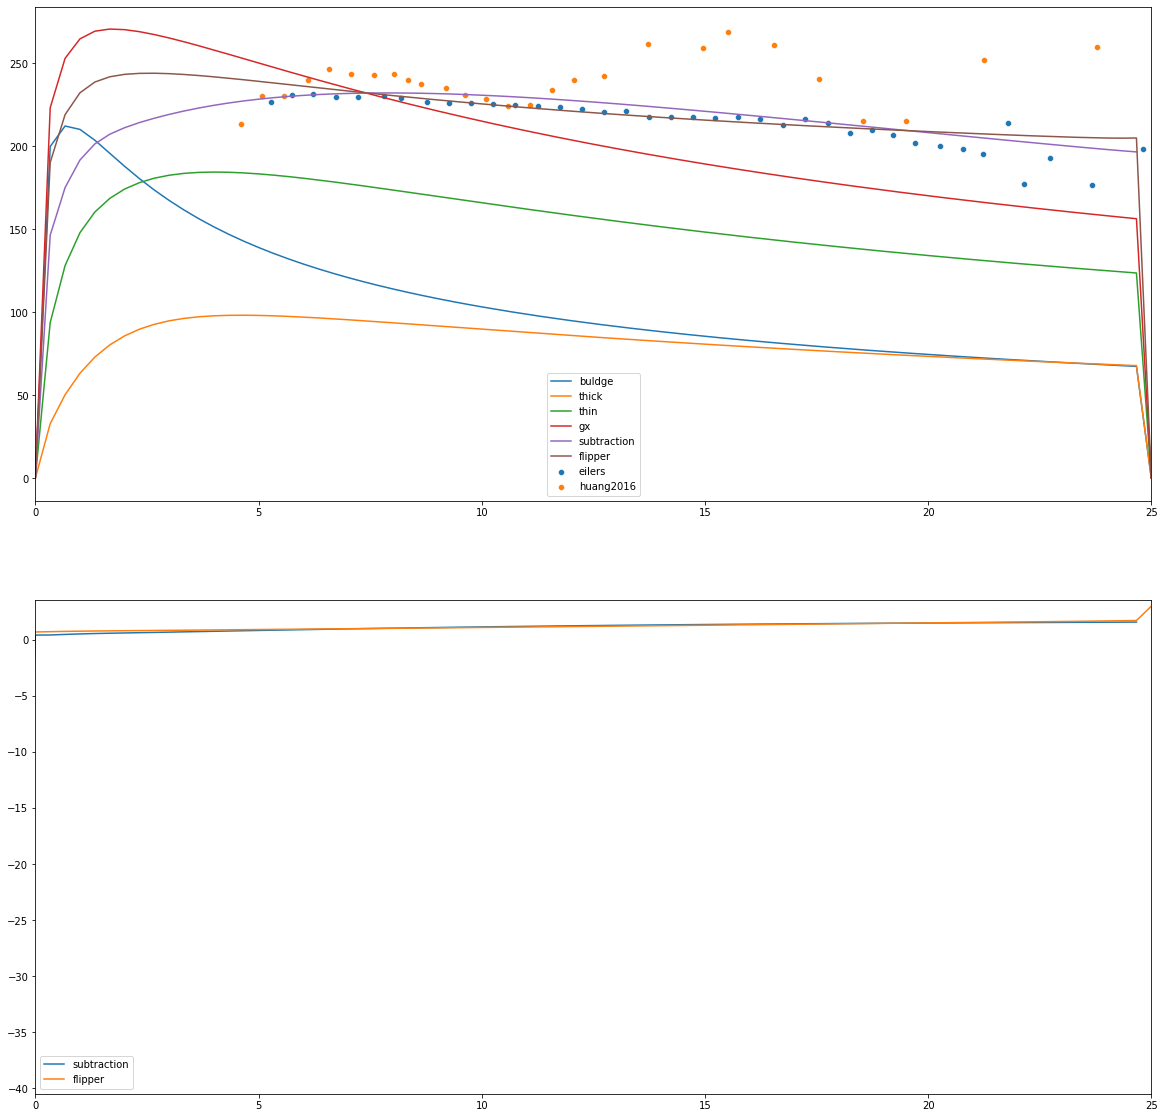

In [65]:
plot_velocities(mcbest, xlim=(0,25), components=True)